### Preprocessing

In [4]:
import pandas as pd

import iris dataset without header

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ikiearth/IRIS_DATASET/main/iris.csv', header=None)
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


create feature and target matrix

In [7]:
X = df.drop([4], axis=1)
y = df[4]

use `LabelEncoder` from sklearn to encode the label into integer

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras import utils

In [9]:
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

use `to_categorical` function from `keras.np_utils` to converts a class vector (integers) to binary class matrix (e.g., for use with `categorical_crossentropy`)

In [11]:
dummy_y = utils.to_categorical(y_encoded)
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

create training set and testing (blind) set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2)

feature scaling based on training set

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

create model in Keras
*   the number of input layers is based on the feature 
*   the number of output layers are based on class number



In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers.legacy import Adam

In [22]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


train the network

In [24]:
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.0349 - accuracy: 0.3083
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.0102 - accuracy: 0.3750
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.9853 - accuracy: 0.4083
Epoch 4/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.9623 - accuracy: 0.4250
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9399 - accuracy: 0.5167
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9182 - accuracy: 0.5583
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8975 - accuracy: 0.6000
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8775 - accuracy: 0.6500
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.6750
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8403 - accuracy: 0.7167
Epoch 11/1000
4/4 [

Text(0, 0.5, 'loss')

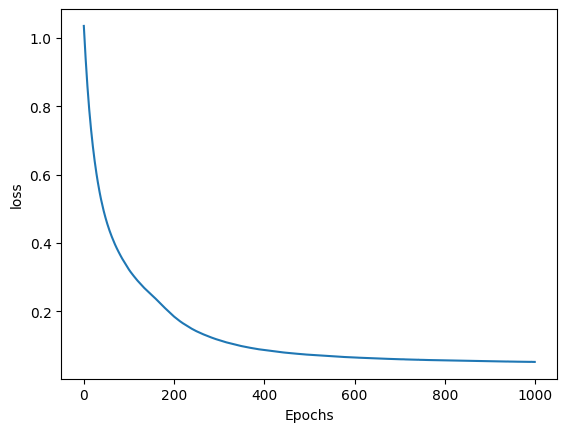

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

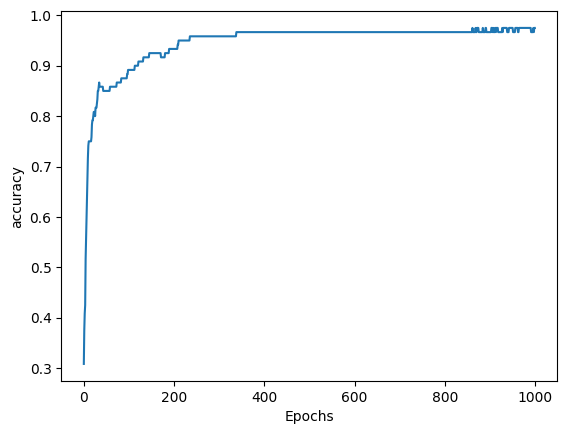

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')

perform prediction and store the result in `y_pred`

In [27]:
y_pred = model.predict(X_test_scaled)

1/1 [==============================] - 0s 43ms/step


the prediction contain the probability vector for each class 

In [28]:
y_pred

array([[1.0402238e-03, 9.9886775e-01, 9.2039307e-05],
       [3.9911084e-03, 9.5602304e-01, 3.9985783e-02],
       [9.9992335e-01, 7.6276890e-05, 3.6163846e-07],
       [3.5593763e-04, 9.9861991e-01, 1.0241062e-03],
       [9.9996257e-01, 3.7357353e-05, 9.8254638e-08],
       [9.9992216e-01, 7.7708792e-05, 1.4189932e-07],
       [9.9995911e-01, 4.0899180e-05, 3.9048292e-08],
       [1.1083391e-03, 9.8989362e-01, 8.9980755e-03],
       [4.6520831e-06, 7.9534315e-03, 9.9204189e-01],
       [2.9167123e-04, 9.9927336e-01, 4.3504129e-04],
       [9.9982661e-01, 1.7335560e-04, 9.0399915e-08],
       [4.2315391e-05, 6.4097267e-01, 3.5898501e-01],
       [1.3284613e-07, 9.9442143e-04, 9.9900550e-01],
       [7.1422719e-06, 9.9991798e-01, 7.4861186e-05],
       [9.9979407e-01, 2.0583460e-04, 6.2204755e-08],
       [2.7613887e-05, 9.9570686e-01, 4.2654909e-03],
       [1.2209442e-05, 4.8529468e-03, 9.9513489e-01],
       [9.9996090e-01, 3.8856735e-05, 1.8977973e-07],
       [9.9966896e-01, 3.309

we can try to evaluate the model with test dataset

In [30]:
__, accuracy = model.evaluate(X_test_scaled, y_test)
accuracy

1/1 [==============================] - 0s 19ms/step - loss: 0.0279 - accuracy: 1.0000


1.0

### Evaluate result using sklearn metrics

Sometime it is easier to use sklearn metrics to evaluate model prediction. Now let's try to use `argmax` function from tensorflow that return the index with the largest value across axes of a tensor.

In [31]:
import tensorflow as tf
tf.argmax(y_pred, 1)

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 2, 0, 0, 1])>

In [36]:
y_pred

array([[1.0402238e-03, 9.9886775e-01, 9.2039307e-05],
       [3.9911084e-03, 9.5602304e-01, 3.9985783e-02],
       [9.9992335e-01, 7.6276890e-05, 3.6163846e-07],
       [3.5593763e-04, 9.9861991e-01, 1.0241062e-03],
       [9.9996257e-01, 3.7357353e-05, 9.8254638e-08],
       [9.9992216e-01, 7.7708792e-05, 1.4189932e-07],
       [9.9995911e-01, 4.0899180e-05, 3.9048292e-08],
       [1.1083391e-03, 9.8989362e-01, 8.9980755e-03],
       [4.6520831e-06, 7.9534315e-03, 9.9204189e-01],
       [2.9167123e-04, 9.9927336e-01, 4.3504129e-04],
       [9.9982661e-01, 1.7335560e-04, 9.0399915e-08],
       [4.2315391e-05, 6.4097267e-01, 3.5898501e-01],
       [1.3284613e-07, 9.9442143e-04, 9.9900550e-01],
       [7.1422719e-06, 9.9991798e-01, 7.4861186e-05],
       [9.9979407e-01, 2.0583460e-04, 6.2204755e-08],
       [2.7613887e-05, 9.9570686e-01, 4.2654909e-03],
       [1.2209442e-05, 4.8529468e-03, 9.9513489e-01],
       [9.9996090e-01, 3.8856735e-05, 1.8977973e-07],
       [9.9966896e-01, 3.309

similarly, use `argmax` on `y_test` to decode the binary matrix back into the label encoding

In [38]:
tf.argmax(y_test, 1)

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 2, 0, 0, 1])>

In [39]:
encoder.inverse_transform(tf.argmax(y_pred, 1))

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

now, we can use `accuracy_score` and `classification_report` from sklearn to evaluate the model  

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(tf.argmax(y_test, 1), tf.argmax(y_pred, 1))

1.0

In [35]:
from sklearn.metrics import classification_report

print(classification_report(tf.argmax(y_test, 1), tf.argmax(y_pred, 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

